<a href="https://colab.research.google.com/github/siddeshnaik/Sparks_Foundation/blob/main/Terrorisum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
!unzip '/content/drive/MyDrive/SPARKS_FOUNDATION/Global_Terrorism_START_data.zip'

Archive:  /content/drive/MyDrive/SPARKS_FOUNDATION/Global_Terrorism_START_data.zip
  inflating: globalterrorismdb_0718dist.csv  


#**EDA**

*   By **Siddesh Naik**
*   GitHub : [Github Code Link](https://github.com/siddeshnaik/Sparks_Foundation)





In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [4]:
given_data = pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding='cp1252', low_memory=False)
given_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


##Looking into Data

In [5]:
given_data.shape 

(181691, 135)

In [6]:
given_data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [7]:
given_data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

##Data Cleaning

In [8]:
df = given_data[['eventid', 'iyear','imonth','country_txt', 
           'region_txt', 'latitude', 'longitude', 
           'provstate', 'city', 'crit1', 'crit2', 'crit3', 
           'success', 'suicide', 'attacktype1_txt', 'targtype1_txt', 
           'targsubtype1_txt', 'natlty1_txt','gname', 'gsubname', 'guncertain1', 
           'claimed', 'weaptype1_txt', 'weapsubtype1_txt', 'nkill','nwound',  ]].copy()
#Renaming for further use
df.rename(columns = {'eventid' : 'EventId', 
                     'iyear' : 'Year',
                     'imonth' : 'Month',
                     'country_txt': 'Country', 
                     'region_txt' : 'Region', 
                     'provstate' : 'Provstate', 
                     'city' : 'City', 
                     'crit1' : 'Crit1', 
                     'crit2' : 'Crit2', 
                     'crit3' : 'Crit3', 
                     'success' : 'Success', 
                     'suicide' : 'Suicide', 
                     'attacktype1_txt' : 'AttackType', 
                     'targtype1_txt' : 'TargType', 
                     'targsubtype1_txt' : 'TargSubType', 
                     'natlty1_txt' : 'Nationality', 
                     'gname' : 'Group', 
                     'guncertain1' : 'GunCertain1', 
                     'claimed' : 'Claimed', 
                     'weaptype1_txt' : 'WeaponType',
                     'weapsubtype1_txt' : 'WeaponSubType', 
                     'nkill' : 'Killed',
                     'nwound' : 'Wounded'}, inplace = True)

In [9]:
df.head()

,EventId,Year,Month,Country,Region,latitude,longitude,Provstate,City,Crit1,Crit2,Crit3,Success,Suicide,AttackType,TargType,TargSubType,Nationality,Group,gsubname,GunCertain1,Claimed,WeaponType,WeaponSubType,Killed,Wounded
0,197000000001,1970,7,Dominican Republic,Central America & Caribbean,18.456792,-69.951164,NaN,Santo Domingo,1,1,1,1,0,Assassination,Private Citizens & Property,Named Civilian,Dominican Republic,MANO-D,NaN,0.0,NaN,Unknown,NaN,1.0,0.0
1,197000000002,1970,0,Mexico,North America,19.371887,-99.086624,Federal,Mexico city,1,1,1,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgium,23rd of September Communist League,NaN,0.0,NaN,Unknown,NaN,0.0,0.0
2,197001000001,1970,1,Philippines,Southeast Asia,15.478598,120.599741,Tarlac,Unknown,1,1,1,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,NaN,0.0,NaN,Unknown,NaN,1.0,0.0
3,197001000002,1970,1,Greece,Western Europe,37.997490,23.762728,Attica,Athens,1,1,1,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,United States,Unknown,NaN,0.0,NaN,Explosives,Unknown Explosive Type,NaN,NaN
4,197001000003,1970,1,Japan,East Asia,33.580412,130.396361,Fukouka,Fukouka,1,1,1,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,United States,Unknown,NaN,0.0,NaN,Incendiary,NaN,NaN,NaN


In [10]:
df['Casualities'] = df['Killed'] + df['Wounded'] # Adding Casualities column 

In [11]:
df.head()

,EventId,Year,Month,Country,Region,latitude,longitude,Provstate,City,Crit1,Crit2,Crit3,Success,Suicide,AttackType,TargType,TargSubType,Nationality,Group,gsubname,GunCertain1,Claimed,WeaponType,WeaponSubType,Killed,Wounded,Casualities
0,197000000001,1970,7,Dominican Republic,Central America & Caribbean,18.456792,-69.951164,NaN,Santo Domingo,1,1,1,1,0,Assassination,Private Citizens & Property,Named Civilian,Dominican Republic,MANO-D,NaN,0.0,NaN,Unknown,NaN,1.0,0.0,1.0
1,197000000002,1970,0,Mexico,North America,19.371887,-99.086624,Federal,Mexico city,1,1,1,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgium,23rd of September Communist League,NaN,0.0,NaN,Unknown,NaN,0.0,0.0,0.0
2,197001000001,1970,1,Philippines,Southeast Asia,15.478598,120.599741,Tarlac,Unknown,1,1,1,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,NaN,0.0,NaN,Unknown,NaN,1.0,0.0,1.0
3,197001000002,1970,1,Greece,Western Europe,37.997490,23.762728,Attica,Athens,1,1,1,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,United States,Unknown,NaN,0.0,NaN,Explosives,Unknown Explosive Type,NaN,NaN,NaN
4,197001000003,1970,1,Japan,East Asia,33.580412,130.396361,Fukouka,Fukouka,1,1,1,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,United States,Unknown,NaN,0.0,NaN,Incendiary,NaN,NaN,NaN,NaN


##Looking into Cleaned data

###**Total Number of Attacks and Total Number of Casualities in a given year**

In [12]:
year_wise_incidents_and_casualities_count=pd.DataFrame({'No. of Incidents':df.groupby(['Year'])['Year'].count(),
                                                        'No. of Casualities': df.groupby(['Year'])['Casualities'].sum(),})
year_wise_incidents_and_casualities_count

,No. of Incidents,No. of Casualities
Year,,
1970,651,367.0
1971,471,119.0
1972,568,602.0
1973,473,621.0
1974,581,1122.0
1975,740,781.0
1976,923,1158.0
1977,1319,874.0
1978,1526,2664.0


In the graph below we can see that in the year **2014 has the highest number of terrorist attacks all around the world** from 1970 - 2017.

Here is an artical [Terror attacks increased by a third in 2014, US says](https://www.bbc.com/news/world-us-canada-33206784) which explains the reason behind such a high increase in terrorist attacks

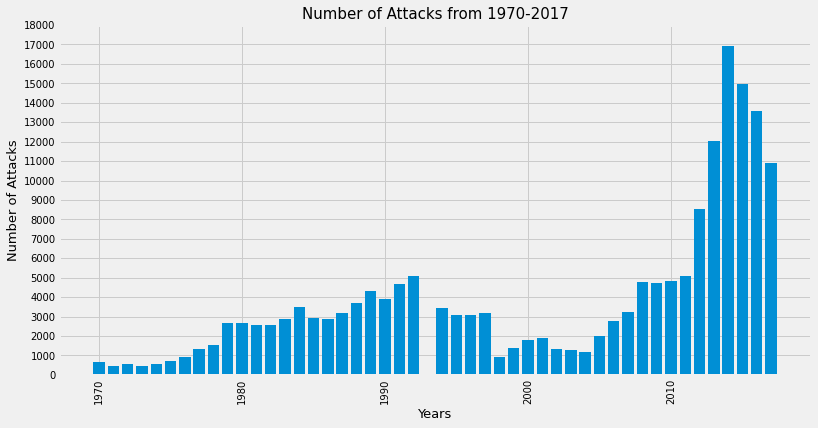

In [13]:
# years with highest attack rates
plt.figure(figsize=(12,6))
plt.bar(list(df['Year'].value_counts().index), df['Year'].value_counts())
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(np.arange(0,19000,1000), fontsize=10)
plt.grid(True)
plt.xlabel('Years', fontsize=13)
plt.ylabel('Number of Attacks', fontsize=13)
plt.title('Number of Attacks from 1970-2017', fontsize=15)
plt.show()

If you see the plot on top anyone would expect since the **number of incidents were highest in 2014** so number of casualities should be high in 2014 as well but from the graph below and the data frame above its shows that **the year 2015 had the highest number of Casualities** and not 2014 

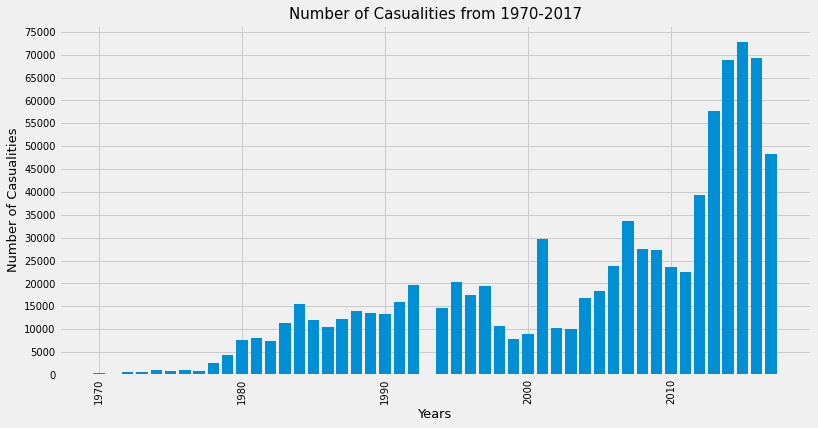

In [14]:
plt.figure(figsize=(12,6))
plt.bar(list(year_wise_incidents_and_casualities_count.index), year_wise_incidents_and_casualities_count['No. of Casualities'])
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(np.arange(0,80000,5000), fontsize=10)
plt.grid(True)
plt.xlabel('Years', fontsize=13)
plt.ylabel('Number of Casualities', fontsize=13)
plt.title('Number of Casualities from 1970-2017', fontsize=15)
plt.show()

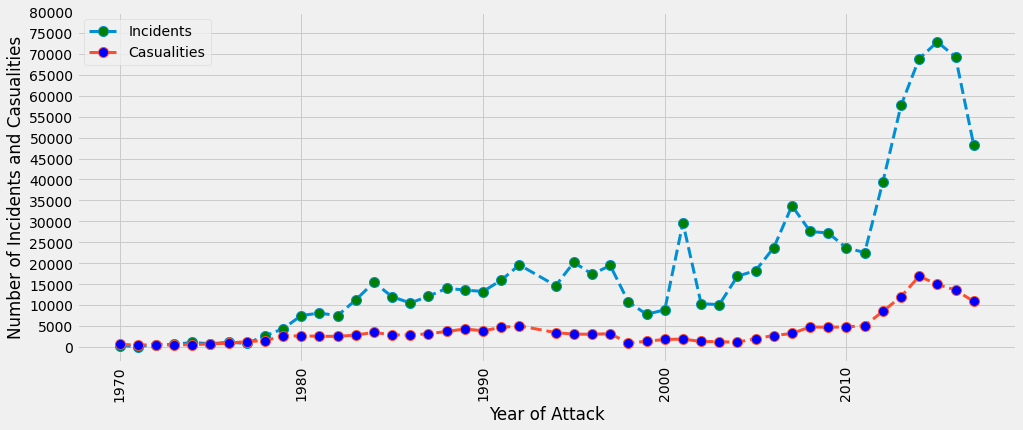

In [15]:
data2=pd.DataFrame({'Casualities':df.groupby(['Year'])['Casualities'].sum(),
              'Incidents': df.groupby(['Year'])['Country'].count(),
              'Casuality Rate': df.groupby(['Year'])['Casualities'].sum()/df.groupby(['Year'])['Country'].count()})

data2.reset_index(inplace=True)


plt.figure(figsize = (15, 6))
plt.plot(data2['Year'],  data2['Casualities'], linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='green', markersize=10, label='Incidents')
plt.plot(data2['Year'], data2['Incidents'], linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=10, label='Casualities')
plt.xticks(rotation = 90)
plt.yticks(np.arange(0,85000,5000))
plt.xlabel("Year of Attack")
plt.ylabel("Number of Incidents and Casualities")
plt.legend()
plt.show()

**Casuality Rate** in different Years

*   Casuality Rate = No. of Casuality/No. of Incidents



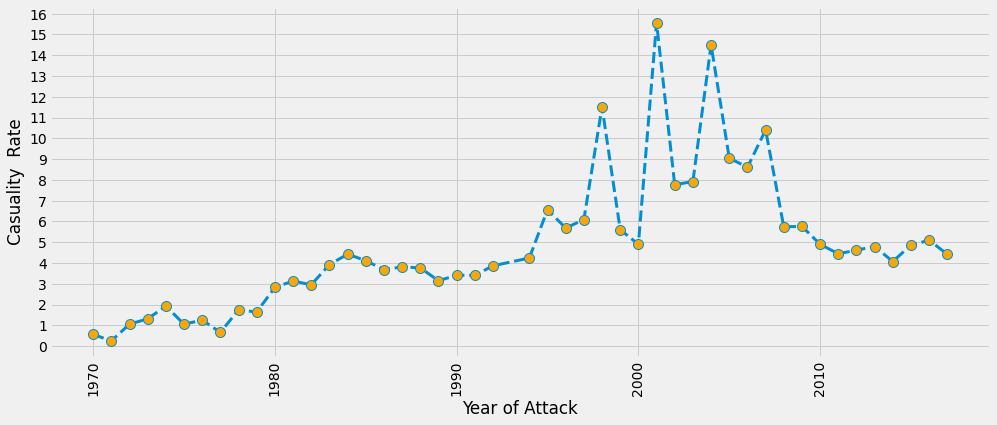

In [16]:
plt.figure(figsize = (15, 6))
plt.plot(data2['Year'], data2['Casuality Rate'], linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='orange', markersize=10, label='Casuality Rate')
plt.xticks(rotation = 90)
plt.yticks(np.arange(0,17,1))
plt.xlabel("Year of Attack")
plt.ylabel("Casuality  Rate")
plt.show()

depicts the year and the country and the number of casualities in that country during a specific year 

In [17]:
temp1=pd.DataFrame(df.groupby(['Year', 'Country'])['Casualities'].sum())
temp1.sort_values(by='Casualities', ascending=False).head(30)

,,Casualities
Year,Country,
2014,Iraq,26209.0
2016,Iraq,25209.0
2013,Iraq,22646.0
2015,Iraq,20308.0
2001,United States,19523.0
2007,Iraq,19333.0
2015,Afghanistan,12460.0
2006,Iraq,12452.0
2016,Afghanistan,12208.0


###So now lets see which **country from 1970 - 2017 which had the highest number of casualities for a particular Year and the type of Attack**

In [18]:
temp_values = {}
contry_incident_cal = []
df1 = df.copy()
df1['Casualities']=df1['Casualities'].fillna(-1000)
for i in range(len(df1)):
    if df1['Year'].iloc[i] in temp_values.keys():
        if temp_values[df1['Year'].iloc[i]][2] < int(df1['Casualities'].iloc[i]):

            temp_values[df1['Year'].iloc[i]][2]=df1['Casualities'].iloc[i]
            temp_values[df1['Year'].iloc[i]][0] = df1['Country'].iloc[i]
            temp_values[df1['Year'].iloc[i]][1] = df1['AttackType'].iloc[i]

    else:
        temp_values[df1['Year'].iloc[i]]=[df1['Country'].iloc[i], df1['AttackType'].iloc[i] ,int(df1['Casualities'].iloc[i])]

The below Data Frame depicts **the year and the country which had the biggest incident in the year an the attack type**, the attack type and the number of casualities in that incident

so for example in the year 2006 the biggest terrorist attack took place in India and there were 1005 Casulaities in that terrorist attack

In [19]:
temp2=pd.DataFrame(temp_values, index=['Country', 'Attack Type','No. of Casualities']).T
temp2

,Country,Attack Type,No. of Casualities
1970,Switzerland,Bombing/Explosion,47
1971,United States,Facility/Infrastructure Attack,27
1972,United Kingdom,Bombing/Explosion,132
1973,United Kingdom,Bombing/Explosion,239
1974,Italy,Bombing/Explosion,110
1975,Kenya,Bombing/Explosion,127
1976,Iraq,Bombing/Explosion,295
1977,Malaysia,Hijacking,100
1978,Iran,Facility/Infrastructure Attack,422
1979,Ethiopia,Unknown,100


**1995 Japan's** highest casualities attack details

In [20]:
#df[(df['Year']==1995) & (df['Country'] == 'Japan') & (df['Casualities']==5513)]
df.iloc[58841]

EventId               199503200014
Year                          1995
Month                            3
Country                      Japan
Region                   East Asia
latitude                   35.6891
longitude                  139.748
Provstate                    Tokyo
City                         Tokyo
Crit1                            1
Crit2                            1
Crit3                            1
Success                          1
Suicide                          0
AttackType         Unarmed Assault
TargType            Transportation
TargSubType                 Subway
Nationality                  Japan
Group               Aum Shinri Kyo
gsubname         Aum Supreme Truth
GunCertain1                      0
Claimed                        NaN
WeaponType                Chemical
WeaponSubType                  NaN
Killed                          13
Wounded                       5500
Casualities                   5513
Name: 58841, dtype: object

So as we can see here there is no summary provide for Japan's 1995 attack the major reason being, there has been many changes as to how data was collected and stored over the years 

[Jan 17, 1995 CE: Kobe Earthquake](https://www.nationalgeographic.org/thisday/jan17/kobe-earthquake/#:~:text=Fractured%20Road%2C%20Japan&text=On%20January%2017%2C%201995%2C%20a%20major%20earthquake%20struck%20near%20the,more%20than%2045%2C000%20people%20homeless.&text=The%20Kobe%20quake%20was%20a,Eurasian%20and%20Philippine%20plates%20interact.) here's an artical explaining the event that took place in 1995

In [21]:
given_data.iloc[58841]['summary'] 

nan

**2001 United States** Higest casualities attack detail

In [22]:
df[(df['Year'] == 2001) & (df['Country'] == 'United States') & (df['Casualities'] == 9574)]

,EventId,Year,Month,Country,Region,latitude,longitude,Provstate,City,Crit1,Crit2,Crit3,Success,Suicide,AttackType,TargType,TargSubType,Nationality,Group,gsubname,GunCertain1,Claimed,WeaponType,WeaponSubType,Killed,Wounded,Casualities
73126,200109110004,2001,9,United States,North America,40.697132,-73.931351,New York,New York City,1,1,1,1,1,Hijacking,Private Citizens & Property,Unnamed Civilian/Unspecified,United States,Al-Qaida,NaN,0.0,1.0,Vehicle (not to include vehicle-borne explosiv...,NaN,1384.0,8190.0,9574.0
73127,200109110005,2001,9,United States,North America,40.697132,-73.931351,New York,New York City,1,1,1,1,1,Hijacking,Private Citizens & Property,Unnamed Civilian/Unspecified,United States,Al-Qaida,NaN,0.0,1.0,Vehicle (not to include vehicle-borne explosiv...,NaN,1383.0,8191.0,9574.0


In [23]:
given_data.iloc[73126]['summary']

'09/11/2001: This was one of four related attacks that occurred in the United States that are known collectively as the 9/11 Terrorist Attacks. In the first attack, which occurred at 8:46 am local time, American Airlines Flight 11 crashed into the North Tower of the World Trade Center Complex in New York City, New York. Five hijackers belonging to Al-Qaida took control of the Boeing 767 aircraft on a flight originating from Logan International Airport in Boston, Massachusetts, and destined for Los Angeles International Airport. There were 76 passengers, 11 crew members and five hijackers on the plane, all of whom died upon impact. The North Tower collapsed at 10:28 a.m. local time after the South Tower had collapsed at 9:59 a.m. local time. At least 2,767 people died as a result of the attacks in New York City, including 10 hijackers as well as responders who contracted cancer and respiratory illnesses at the attack site and passed away years later. More than 16,000 others were injured

**2006 India's** highest casualities attack details  



In [24]:
#df[(df['Year'] == 2006) & (df['Country'] == 'India') & (df['Casualities'] == 1005)]
df.iloc[81098]

EventId                        200607120001
Year                                   2006
Month                                     7
Country                               India
Region                           South Asia
latitude                             19.076
longitude                           72.8777
Provstate                       Maharashtra
City                                 Mumbai
Crit1                                     1
Crit2                                     1
Crit3                                     1
Success                                   1
Suicide                                   0
AttackType                Bombing/Explosion
TargType                     Transportation
TargSubType      Train/Train Tracks/Trolley
Nationality                           India
Group                 Lashkar-e-Taiba (LeT)
gsubname                                NaN
GunCertain1                               0
Claimed                                   0
WeaponType                      

In [25]:
given_data.iloc[81098]['summary']

'07/11/2006: A series of train bombings killed at least 188 civilians in Mumbai, India. The train bombing injured another 817 others injured in a string of seven blasts that spanned 56 kms, from Churchgate to Mira Road. One of the 13 arrested suspects, Asif Bashir Khan alias Junaid, emerged as the chief operative of the militant outfit, Lashkar-e Taiba. Fifteen others remained wanted at the time, including nine Pakistani nationals.'

**United States 2017** highest casualities attack details

In [26]:
#df[(df['Year'] == 2017) & (df['Country'] == 'United States') & (df['Casualities'] == 910)]
df.iloc[179344]

EventId                                   201710010018
Year                                              2017
Month                                               10
Country                                  United States
Region                                   North America
latitude                                       36.0826
longitude                                     -115.136
Provstate                                       Nevada
City                                         Las Vegas
Crit1                                                1
Crit2                                                1
Crit3                                                1
Success                                              1
Suicide                                              0
AttackType                               Armed Assault
TargType                                      Business
TargSubType      Entertainment/Cultural/Stadium/Casino
Nationality                              United States
Group     

In [27]:
given_data.iloc[179344]['summary']

'10/01/2017: An assailant opened fire from the Mandalay Bay Hotel on the Route 91 Harvest Festival concert in Las Vegas, Nevada, United States. At least 58 people were killed and 851 people were injured in the attack. The assailant shot and killed himself before police reached him. No group claimed responsibility for the incident; however, authorities identified the assailant as Stephen Paddock, an anti-government extremist. Witnesses overheard Paddock espousing anger over the 1990s standoffs in Waco, Texas and Ruby Ridge, Idaho. Paddock also expressed concern over the US government "confiscating guns."'

###Different Types of **Attack Types** and their **Casualities, Incident count and Casuality_rate**

In [28]:
pd.DataFrame({'Casualities':df.groupby(['AttackType'])['Casualities'].sum(),
                      'Incidents': df['AttackType'].value_counts(),
                      'Casuality_rate': df.groupby(['AttackType'])['Casualities'].sum().div(df['AttackType'].value_counts())})

,Casualities,Incidents,Casuality_rate
Armed Assault,212386.0,42669,4.977525
Assassination,37209.0,19312,1.926729
Bombing/Explosion,514233.0,88255,5.826673
Facility/Infrastructure Attack,6293.0,10356,0.607667
Hijacking,20642.0,659,31.323217
Hostage Taking (Barricade Incident),7465.0,991,7.532795
Hostage Taking (Kidnapping),20267.0,11158,1.816365
Unarmed Assault,14791.0,1015,14.572414
Unknown,39606.0,7276,5.443375


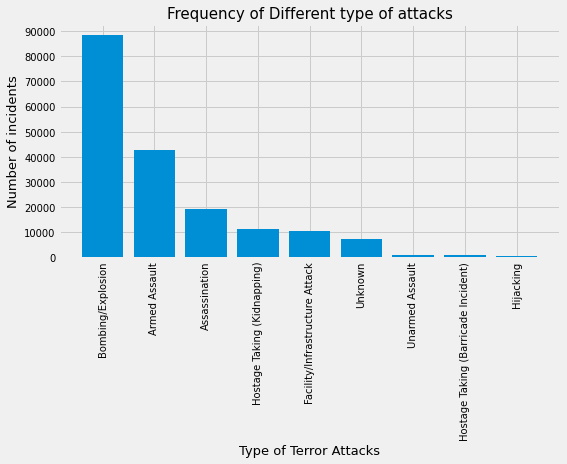

In [29]:
plt.figure(figsize=(8,4))
#plt.hist(df['AttackType'], bins=18)
plt.bar(list(df['AttackType'].value_counts().index),df['AttackType'].value_counts())
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(np.arange(0,100000,10000), fontsize=10)
plt.grid(True)
plt.xlabel('Type of Terror Attacks', fontsize=13)
plt.ylabel('Number of incidents', fontsize=13)
plt.title('Frequency of Different type of attacks', fontsize=15)
plt.show()

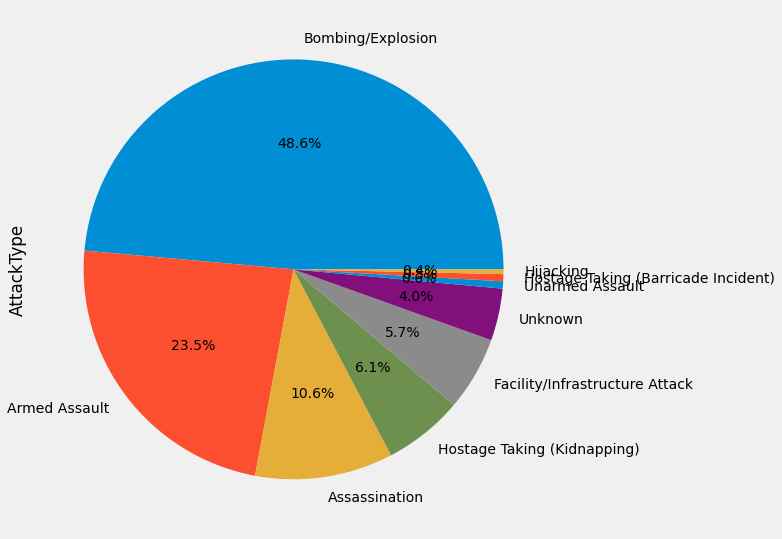

In [30]:
plt.figure(figsize=(9,9))
df['AttackType'].value_counts().plot.pie(autopct="%1.1f%%")
#plt.title('Attack Types')
plt.show()

### **most attacked countries and Cities** 

In [31]:
most_attacked_countries=df['Country'].value_counts().head(30)
most_attacked_countries

Iraq                        24636
Pakistan                    14368
Afghanistan                 12731
India                       11960
Colombia                     8306
Philippines                  6908
Peru                         6096
El Salvador                  5320
United Kingdom               5235
Turkey                       4292
Somalia                      4142
Nigeria                      3907
Thailand                     3849
Yemen                        3347
Spain                        3249
Sri Lanka                    3022
United States                2836
Algeria                      2743
France                       2693
Egypt                        2479
Lebanon                      2478
Chile                        2365
Libya                        2249
West Bank and Gaza Strip     2227
Syria                        2201
Russia                       2194
Israel                       2183
Guatemala                    2050
South Africa                 2016
Nicaragua     

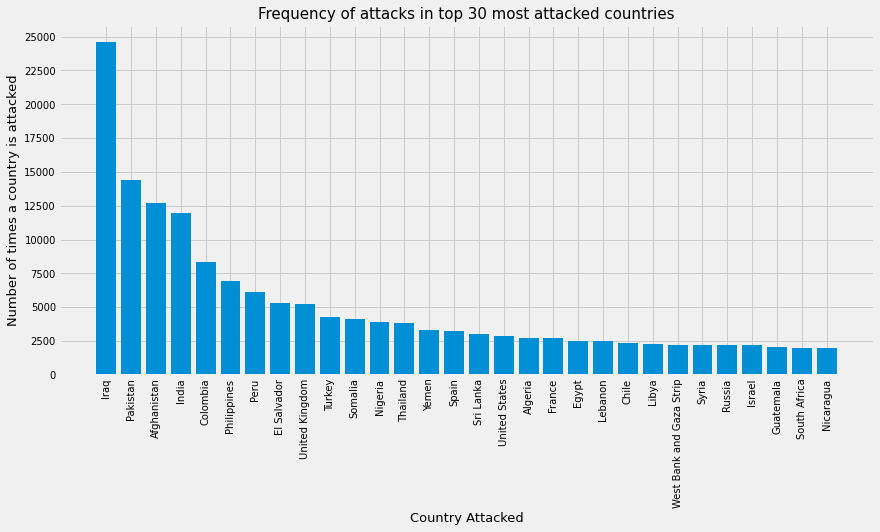

In [32]:
plt.figure(figsize=(13,6))
plt.bar(list(most_attacked_countries.index),most_attacked_countries)
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(np.arange(0,27500,2500), fontsize=10)
plt.grid(True)
plt.xlabel('Country Attacked', fontsize=13)
plt.ylabel('Number of times a country is attacked', fontsize=13)
plt.title('Frequency of attacks in top 30 most attacked countries', fontsize=15)
plt.show()

Different Types Of **Attacks Types** and The **number of incidents** from that Attack type in that **country**


*   Something To note here
*   **U.K** and **Pakistan** have a very high number of **Assassination** Attacks and Assassination attack type takes the **second place** in terms of number of attacks in **U.K** and **Third place** in **Pakistan**. 





In [33]:
df.groupby(['Country', 'AttackType'])['AttackType'].count().sort_values(ascending=False).head(30)

Country         AttackType       
Iraq            Bombing/Explosion    18286
Pakistan        Bombing/Explosion     7613
Afghanistan     Bombing/Explosion     6245
India           Bombing/Explosion     4825
Pakistan        Armed Assault         3859
India           Armed Assault         3184
Iraq            Armed Assault         3155
Colombia        Bombing/Explosion     3128
Peru            Bombing/Explosion     3115
Afghanistan     Armed Assault         2877
El Salvador     Armed Assault         2216
Philippines     Bombing/Explosion     2213
                Armed Assault         2158
France          Bombing/Explosion     2092
United Kingdom  Bombing/Explosion     2092
El Salvador     Bombing/Explosion     2055
Colombia        Armed Assault         1972
Turkey          Bombing/Explosion     1957
Spain           Bombing/Explosion     1902
Thailand        Bombing/Explosion     1852
Chile           Bombing/Explosion     1774
Nigeria         Armed Assault         1737
United Kingdom  Assa

In [34]:
pd.DataFrame({'No. of Incidents':df.groupby(['Country','City'])['City'].count(),
              'No. of Casualities':df.groupby(['Country','City'])['Casualities'].sum()}).sort_values(by='No. of Casualities', ascending=False)

No. of Incidents  No. of Casualities
Country       City                                               
Iraq          Baghdad                    7585             76894.0
United States New York City               460             19618.0
Iraq          Mosul                      2265             12360.0
Pakistan      Karachi                    2651              9201.0
Somalia       Mogadishu                  1581              8603.0
...                                       ...                 ...
Nigeria       Kulungu                       1                 0.0
              Kumbur                        1                 0.0
              Kummabza                      1                 0.0
              Kumuya                        1                 0.0
Mali          Founou                        1                 0.0

[38120 rows x 2 columns]

###**Different Types of Targets and Sub Target Types**  

**Most Attacked target type is Private Citizens & Property**

In [35]:
pd.DataFrame({'Number of Attacks':df['TargType'].value_counts(),
              'Sr. No.': range(1,len(df['TargType'].unique())+1)}).reset_index().set_index('Sr. No.').rename(columns={'index':'Target Type'})

# Incase you didn't understand the code
# The .reset_index() resets the index and we now get a new index starting from 0
# But i wanted the index to start from 1 so i create a column Sr. No. in the dataframe and than using set_index('Sr. No.') set it to Sr. No. column
# Now i use rename() func to rename the old index column which which gets its column name as index after reseting the index using .reset_index to Target Type

,Target Type,Number of Attacks
Sr. No.,,
1,Private Citizens & Property,43511
2,Military,27984
3,Police,24506
4,Government (General),21283
5,Business,20669
6,Transportation,6799
7,Utilities,6023
8,Unknown,5898
9,Religious Figures/Institutions,4440


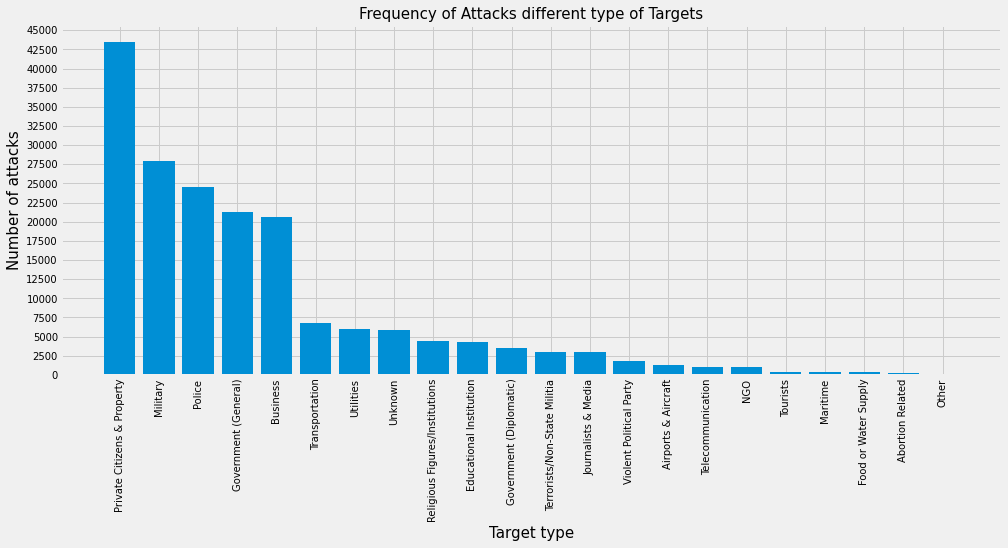

In [36]:
plt.figure(figsize=(15,6))
plt.bar(list(df['TargType'].value_counts().index), df['TargType'].value_counts())
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(np.arange(0,47500,2500), fontsize=10)
plt.grid(True)
plt.xlabel('Target type', fontsize=15)
plt.ylabel('Number of attacks', fontsize=15)
plt.title('Frequency of Attacks different type of Targets', fontsize=15)
plt.show()

**Number of Times a Target SubType was Attacked**

In [37]:
pd.DataFrame({'No. of Times the Target SubType was attacked':df.groupby(['TargType', 'TargSubType'])['TargSubType'].count()}).sort_values(by='No. of Times the Target SubType was attacked', ascending=False).head(30)

No. of Times the Target SubType was attacked
TargType                       TargSubType                                                                                     
Private Citizens & Property    Unnamed Civilian/Unspecified                                                               11596
Police                         Police Security Forces/Officers                                                            11178
Military                       Military Unit/Patrol/Convoy                                                                 8277
                               Military Personnel (soldiers, troops, officers,...                                          7963
Government (General)           Government Personnel (excluding police, military)                                           6610
Private Citizens & Property    Village/City/Town/Suburb                                                                    6542
Government (General)           Politician or Political Party Movement/Meeting/...                                          6306
Police                         Police Building (headquarters, station, school)                                             5907
Military                       Military Barracks/Base/Headquarters/Checkpost                                               5211
Police                         Police Patrol (including vehicles and convoys)                                              5105
Government (General)           Government Building/Facility/Office                                                         4802
Business                       Retail/Grocery/Bakery                                                                       4274
Utilities                      Electricity                                                                                 4198
Business                       Bank/Commerce                                                                               3242
Private Citizens & Property    House/Apartment/Residence                                                                   3044
Educational Institution        School/University/Educational Building                                                      2990
Private Citizens & Property    Vehicles/Transportation                                                                     2928
                               Marketplace/Plaza/Square                                                                    2840
Transportation                 Bus (excluding tourists)                                                                    2818
Religious Figures/Institutions Place of Worship                                                                            2630
Private Citizens & Property    Named Civilian                                                                              2549
                               Laborer (General)/Occupation Identified                                                     2497
Transportation                 Train/Train Tracks/Trolley                                                                  2213
Private Citizens & Property    Religion Identified                                                                         2189
Terrorists/Non-State Militia   Non-State Militia                                                                           2014
Military                       Military Transportation/Vehicle (excluding conv...                                          1989
Private Citizens & Property    Political Party Member/Rally                                                                1932
Military                       Military Checkpoint                                                                         1911
Police                         Police Checkpoint                                                                           1828
Business                       Restaurant/Bar/Café                                                                 

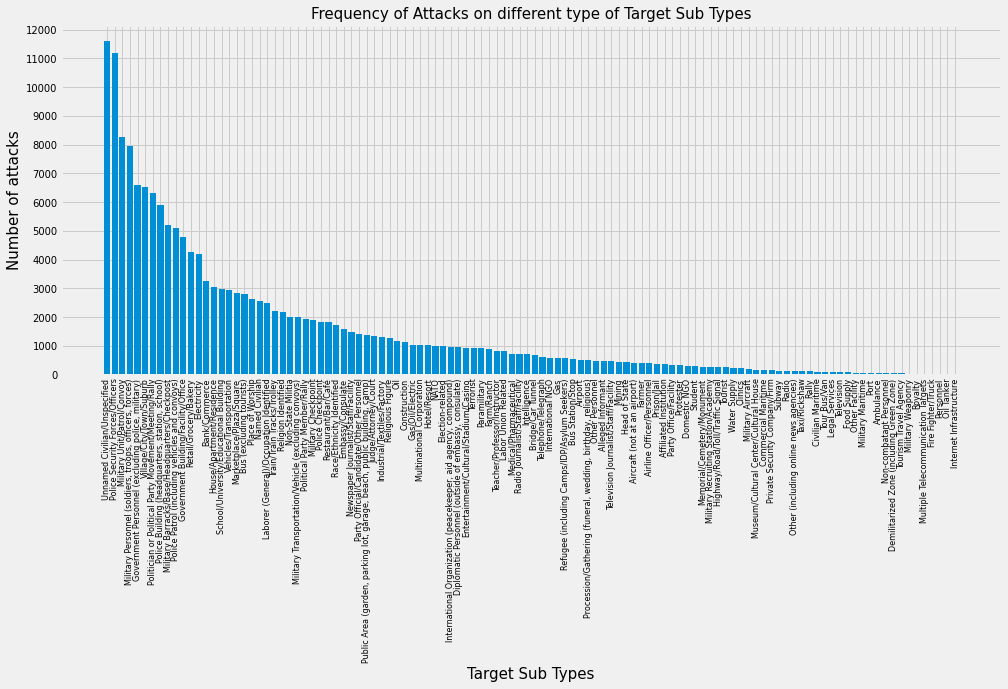

In [38]:
plt.figure(figsize=(15,6))
plt.bar(list(df['TargSubType'].value_counts().index), df['TargSubType'].value_counts())
plt.xticks(rotation = 90, fontsize=8)
plt.yticks(np.arange(0,13000,1000), fontsize=10)
plt.grid(True)
plt.xlabel('Target Sub Types', fontsize=15)
plt.ylabel('Number of attacks', fontsize=15)
plt.title('Frequency of Attacks on different type of Target Sub Types', fontsize=15)
plt.show()

###**Nationality of Attack Groups** and the **number of Attacks done by them**

In [39]:
df['Nationality'].value_counts().head(20)

Iraq                24113
Pakistan            13900
India               12098
Afghanistan         10931
Colombia             7922
Philippines          6685
Peru                 5840
El Salvador          5212
United States        5065
Turkey               4636
Israel               4097
Thailand             3804
Nigeria              3759
Northern Ireland     3367
Somalia              3160
Yemen                3123
Spain                3096
France               2918
Sri Lanka            2851
International        2699
Name: Nationality, dtype: int64

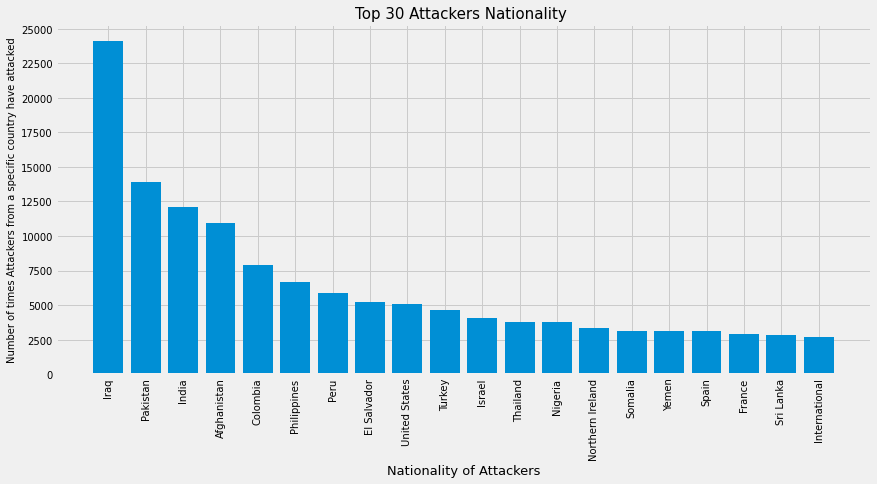

In [40]:
plt.figure(figsize=(13,6))
plt.bar(list(df['Nationality'].value_counts().head(20).index),df['Nationality'].value_counts().head(20))
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(np.arange(0,27500,2500), fontsize=10)
plt.grid(True)
plt.xlabel('Nationality of Attackers', fontsize=13)
plt.ylabel('Number of times Attackers from a specific country have attacked', fontsize=10)
plt.title('Top 30 Attackers Nationality ', fontsize=15)
plt.show()

###**Terrorism Groups** and **Number of Attacks** done by them 

In [75]:
Terrorisum_groups=df['Group'].value_counts().head(30)
Terrorisum_groups.index.name='Terrorist Group Name' 
Terrorisum_groups.name = 'Number of attacks'
Terrorisum_groups

Terrorist Group Name
Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
National Liberation Army of Colombia (ELN)           1561
Tehrik-i-Taliban Pakistan (TTP)                    

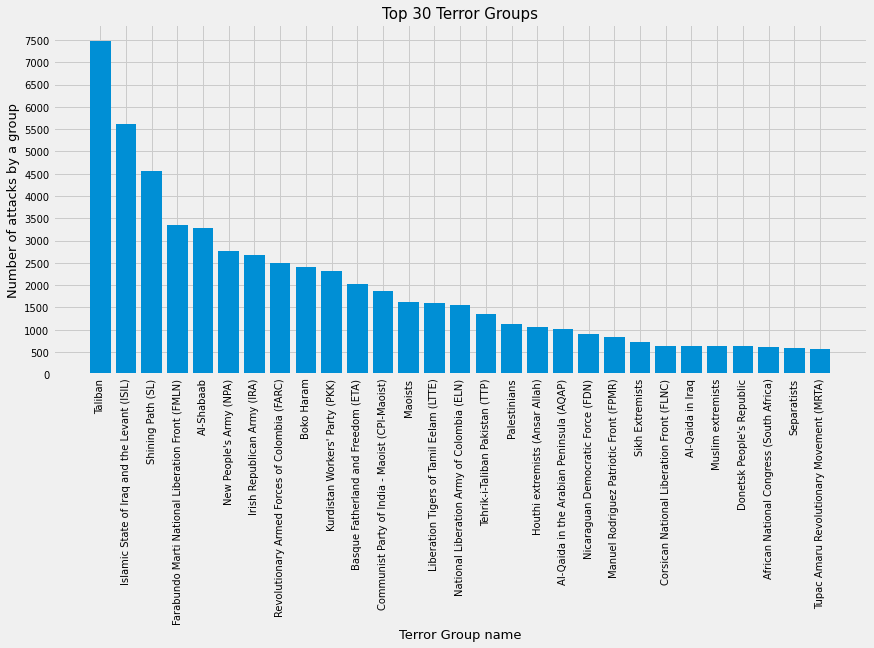

In [67]:
if 'Unknown' in Terrorisum_groups.index:
    Terrorisum_groups.drop('Unknown', axis=0, inplace=True)
plt.figure(figsize=(13,6))
plt.bar(list(Terrorisum_groups.index),Terrorisum_groups)
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(np.arange(0,8000,500), fontsize=10)
plt.grid(True)
plt.xlabel('Terror Group name', fontsize=13)
plt.ylabel('Number of attacks by a group', fontsize=13)
plt.title('Top 30 Terror Groups', fontsize=15)
plt.show()

The **Country** where a **Terrorist Group** has **attacked** and the **total number of attacks and casualities** and the **different attack types** done by these groups in that country

In [68]:
pd.DataFrame({'No. of Attacks':df.groupby(['Country','Group'])['Group'].count(),
            "No. of Casualities":df.groupby(['Country','Group'])['Casualities'].sum(),
              'Attack Type': df.groupby(['Country', 'Group'])['AttackType'].unique()}).sort_values(by='No. of Casualities',ascending=False)

No. of Attacks  ...                                        Attack Type
Country     Group                                                        ...                                                   
Iraq        Unknown                                               18520  ...  [Hijacking, Bombing/Explosion, Assassination, ...
Afghanistan Taliban                                                7423  ...  [Hostage Taking (Kidnapping), Hijacking, Bombi...
Iraq        Islamic State of Iraq and the Levant (ISIL)            4797  ...  [Bombing/Explosion, Armed Assault, Assassinati...
Pakistan    Unknown                                               10891  ...  [Assassination, Bombing/Explosion, Unarmed Ass...
Sri Lanka   Liberation Tigers of Tamil Eelam (LTTE)                1596  ...  [Assassination, Armed Assault, Bombing/Explosi...
...                                                                 ...  ...                                                ...
Netherlands Kurdish Militants                                         2  ...                       [Bombing/Explosion, Unknown]
            Kurdish Separatists                                       1  ...                                          [Unknown]
            Neo-Nazi extremists                                       1  ...                   [Facility/Infrastructure Attack]
            Northern Terror Front                                     2  ...                   [Facility/Infrastructure Attack]
Panama      Gutierrez Gomez Resistance Group                          2  ...                                [Bombing/Explosion]

[5363 rows x 3 columns]

**Claim Mode** by Different Terror **Groups**

In [69]:
given_data['claimmode_txt'].value_counts()

Personal claim                   5207
Posted to website, blog, etc.    4506
Unknown                          3977
Call (post-incident)             1780
Note left at scene               1212
E-mail                           1076
Other                             459
Video                             354
Letter                            333
Call (pre-incident)               179
Name: claimmode_txt, dtype: int64

**Claims mode** made us by different **terror groups** and the **Total number of time the same claim mode** used  

In [70]:
given_data.groupby(['gname','claimmode_txt'])['claimmode_txt'].count().sort_values(ascending=False).head(30)

gname                                           claimmode_txt                
Taliban                                         Personal claim                   1488
Islamic State of Iraq and the Levant (ISIL)     Posted to website, blog, etc.    1276
Taliban                                         Unknown                           983
Islamic State of Iraq and the Levant (ISIL)     Personal claim                    856
Taliban                                         Posted to website, blog, etc.     660
Al-Shabaab                                      Personal claim                    623
Al-Qaida in Iraq                                Posted to website, blog, etc.     354
Al-Shabaab                                      Unknown                           289
Communist Party of India - Maoist (CPI-Maoist)  Note left at scene                289
Taliban                                         Call (post-incident)              265
Al-Shabaab                                      Posted to webs

###**Country** wise **Attack** Details

In [46]:
casualities_per_country=df.groupby(['Country'])['Casualities'].sum()
casualities_per_country.sort_values(ascending=False).head(20)

Country
Iraq             202982.0
Afghanistan       80213.0
Pakistan          64427.0
India             47108.0
Sri Lanka         29792.0
United States     24469.0
Colombia          23767.0
Philippines       22361.0
Nigeria           21728.0
Syria             21614.0
Algeria           19296.0
Somalia           16720.0
Turkey            16694.0
Yemen             16288.0
Peru              16246.0
El Salvador       16181.0
Lebanon           14765.0
Russia            11126.0
Thailand          10476.0
Nicaragua         10437.0
Name: Casualities, dtype: float64

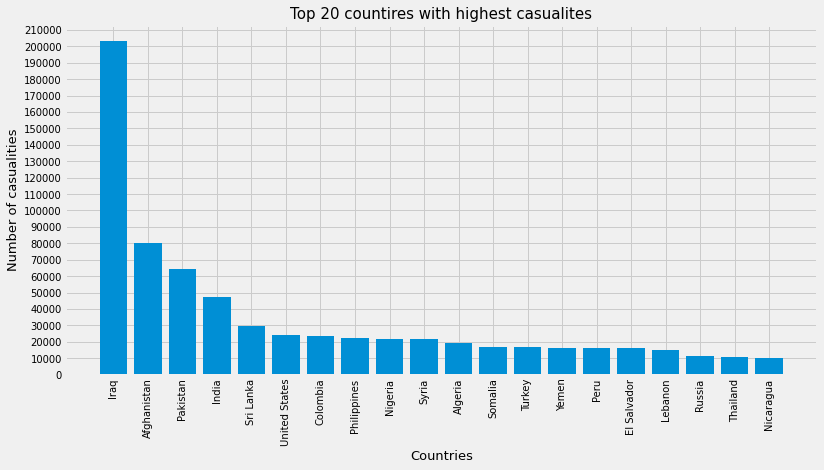

In [47]:
countries_with_casualities=casualities_per_country.sort_values(ascending=False).head(20)
plt.figure(figsize=(12,6))
plt.bar(list(countries_with_casualities.index), countries_with_casualities)
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(np.arange(0,220000,10000), fontsize=10)
plt.grid(True)
plt.xlabel('Countries', fontsize=13)
plt.ylabel('Number of casualities', fontsize=13)
plt.title('Top 20 countires with highest casualites', fontsize=15)
plt.show()

Total Number of **Deaths in a country** from 1970-2017

In [48]:
#deaths in usa are less
deaths_per_country=df.groupby(['Country'])['Killed'].sum()
deaths_per_country.sort_values(ascending=False).head(20)

Country
Iraq                                78589.0
Afghanistan                         39384.0
Pakistan                            23822.0
Nigeria                             22682.0
India                               19341.0
Sri Lanka                           15530.0
Syria                               15229.0
Colombia                            14698.0
Peru                                12771.0
El Salvador                         12053.0
Algeria                             11066.0
Nicaragua                           10598.0
Somalia                             10273.0
Philippines                          9559.0
Yemen                                8776.0
Turkey                               6888.0
Guatemala                            5167.0
Russia                               4308.0
Burundi                              4205.0
Democratic Republic of the Congo     4069.0
Name: Killed, dtype: float64

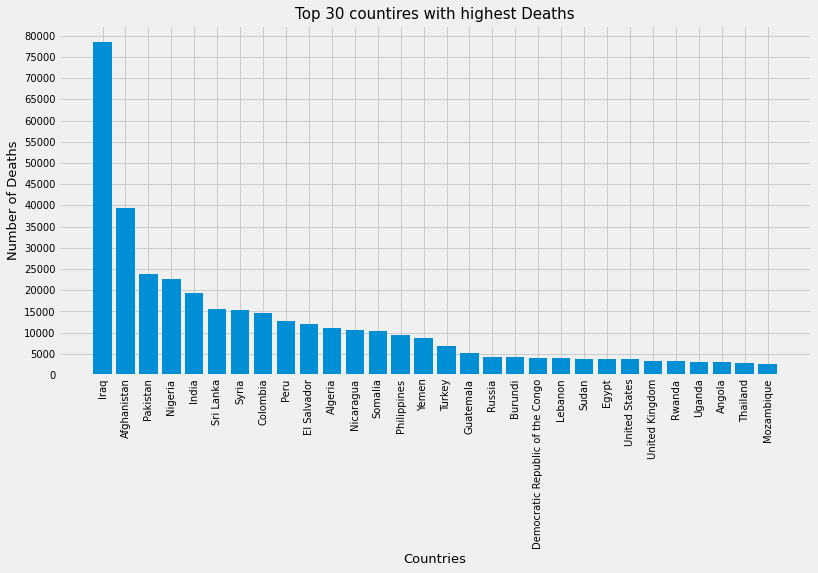

In [49]:
plt.figure(figsize=(12,6))
plt.bar(list(deaths_per_country.sort_values(ascending=False).head(30).index), deaths_per_country.sort_values(ascending=False).head(30))
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(np.arange(0,85000,5000), fontsize=10)
plt.grid(True)
plt.xlabel('Countries', fontsize=13)
plt.ylabel('Number of Deaths', fontsize=13)
plt.title('Top 30 countires with highest Deaths', fontsize=15)
plt.show()

**Year** and **Country** and the **number of attacks** in that country for that particular year

In [50]:
#year , country wise attacks
Year_wise_attacked_countries=pd.DataFrame({'No. of Attacks':df.groupby(['Year','Country' ])['Year'].count()})
Year_wise_attacked_countries

No. of Attacks
Year Country                                 
1970 Argentina                             21
     Australia                              1
     Belgium                                1
     Bolivia                                1
     Brazil                                 6
...                                       ...
2017 Vietnam                                2
     West Bank and Gaza Strip              83
     Yemen                                226
     Zambia                                 2
     Zimbabwe                               3

[3762 rows x 1 columns]

###Different **Weapon Types** Used in Terrorism Attacks world wide

Different **Weapon Types** and the Total **number of times** they have been used

In [51]:
#Number of incidents
df['WeaponType'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

Different **Types of Weapons** used and the **number of the times** they were **successfull** in using this weapons 

In [52]:
pd.DataFrame({'No. of incidents' : df['WeaponType'].value_counts(),
              'No. of Successful Incidents':df.groupby(['WeaponType'])['Success'].sum(),
              'Success Ratio': df.groupby(['WeaponType'])['Success'].sum()/df['WeaponType'].value_counts()})

,No. of incidents,No. of Successful Incidents,Success Ratio
Biological,35,15,0.428571
Chemical,321,243,0.757009
Explosives,92426,79746,0.862809
Fake Weapons,33,18,0.545455
Firearms,58524,54090,0.924236
Incendiary,11135,10472,0.940458
Melee,3655,3286,0.899042
Other,114,90,0.789474
Radiological,14,2,0.142857
Sabotage Equipment,141,133,0.943262


Different **Terror Groups** and different **Weapons** and **weapon Sub Type** used by them

In [53]:
pd.DataFrame(df.groupby(['Group', 'WeaponType'])['WeaponSubType'].unique()).head(30)

WeaponSubType
Group                                              WeaponType                                                   
1 May                                              Explosives                           [Unknown Explosive Type]
                                                   Firearms                                            [Handgun]
14 K Triad                                         Incendiary                              [Gasoline or Alcohol]
14 March Coalition                                 Firearms                                   [Unknown Gun Type]
14th of December Command                           Explosives                           [Unknown Explosive Type]
15th of September Liberation Legion                Explosives                           [Unknown Explosive Type]
16 January Organization for the Liberation of T... Explosives  [Projectile (rockets, mortars, RPGs, etc.), Un...
                                                   Firearms                  [Automatic or Semi-Automatic Rifle]
1920 Revolution Brigades                           Explosives                                          [Vehicle]
19th of July Christian Resistance Brigade          Firearms                  [Automatic or Semi-Automatic Rifle]
1st of May Group                                   Explosives                           [Unknown Explosive Type]
                                                   Incendiary                                              [nan]
                                                   Unknown                                                 [nan]
2 April Group                                      Explosives                           [Unknown Explosive Type]
20 December Movement (M-20)                        Explosives  [Unknown Explosive Type, Grenade, Projectile (...
                                                   Firearms         [Automatic or Semi-Automatic Rifle, Handgun]
                                                   Unknown                                                 [nan]
22 May 1948                                        Incendiary                                              [nan]
23 May Democratic Alliance (Algeria)               Unknown                                                 [nan]
23rd of September Communist League                 Explosives                           [Unknown Explosive Type]
                                                   Firearms    [Automatic or Semi-Automatic Rifle, Handgun, U...
                                                   Unknown                                                 [nan]
28 February Armed Group                            Incendiary                                              [nan]
28 May Armenian Organization                       Explosives                           [Unknown Explosive Type]
28s                                                Incendiary                              [Gasoline or Alcohol]
28th of December Group                             Explosives                           [Unknown Explosive Type]
2nd of June Movement                               Explosives                           [Unknown Explosive Type]
                                                   Firearms                          [Handgun, Unknown Gun Type]
                                                   Unknown                                                 [nan]
31 January People's Front (FP-31)                  Explosives                  [Unknown Explosive Type, Grenade]

Attacks done by different **Groups** in different **Countries** and the different **Weapons Type** and **Weapons Sub Type** used and the **Number of casualities** caused by them

In [54]:
pd.DataFrame(df.groupby(['Country','Group', 'WeaponType', 'WeaponSubType'])['Casualities'].sum().head(30))

Casualities
Country     Group                                 WeaponType WeaponSubType                                         
Afghanistan Afghan Guerrillas                     Explosives Projectile (rockets, mortars, RPGs, etc.)         64.0
                                                  Firearms   Automatic or Semi-Automatic Rifle                  0.0
            Afghan Mujahideen                     Explosives Projectile (rockets, mortars, RPGs, etc.)          0.0
                                                             Unknown Explosive Type                             0.0
                                                  Firearms   Automatic or Semi-Automatic Rifle                 31.0
            Afghan Rebels                         Explosives Landmine                                          36.0
                                                             Unknown Explosive Type                             4.0
            Al-Fatah                              Explosives Other Explosive Type                               2.0
            Al-Qaida                              Explosives Grenade                                            3.0
                                                             Projectile (rockets, mortars, RPGs, etc.)         43.0
                                                             Suicide (carried bodily by human being)           73.0
                                                             Time Fuse                                          0.0
                                                             Unknown Explosive Type                           194.0
                                                             Vehicle                                           43.0
                                                  Firearms   Unknown Gun Type                                   4.0
            Anti-United States extremists         Explosives Projectile (rockets, mortars, RPGs, etc.)          0.0
            Guerrillas                            Explosives Projectile (rockets, mortars, RPGs, etc.)         85.0
            Gunmen                                Firearms   Unknown Gun Type                                  13.0
            Haji Fateh                            Firearms   Unknown Gun Type                                   0.0
            Haqqani Network                       Explosives Landmine                                           3.0
                                                             Projectile (rockets, mortars, RPGs, etc.)         60.0
                                                             Sticky Bomb                                        0.0
                                                             Suicide (carried bodily by human being)          602.0
                                                             Unknown Explosive Type                            67.0
                                                             Vehicle                                          605.0
                                                  Firearms   Unknown Gun Type                                  40.0
            Harakat-i-Inqilahi-i-Islami           Firearms   Automatic or Semi-Automatic Rifle                  1.0
            Hezb-e Wahdat-e Islami-yi Afghanistan Firearms   Automatic or Semi-Automatic Rifle                  5.0
            Hizb-I-Islami                         Explosives Landmine                                           2.0
                                                             Other Explosive Type                               0.0

Different **Weapon Types** and **Weapon Sub Types** and the **Total number of Incidents and Casualities**

In [55]:
pd.DataFrame({'No. of Incidents':df.groupby(['WeaponType','WeaponSubType'])['WeaponSubType'].count(),
              'No. of Casualities':df.groupby(['WeaponType','WeaponSubType'])['Casualities'].sum()})

No. of Incidents  No. of Casualities
WeaponType   WeaponSubType                                                                  
Chemical     Explosive                                                65              2473.0
             Poisoning                                                83              3547.0
Explosives   Dynamite/TNT                                           1222              3598.0
             Grenade                                                5167             27846.0
             Landmine                                               4251             19736.0
             Letter Bomb                                             548               652.0
             Other Explosive Type                                   7304             22089.0
             Pipe Bomb                                               625               277.0
             Pressure Trigger                                        219               701.0
             Projectile (rockets, mortars, RPGs, etc.)              9848             47226.0
             Remote Trigger                                         2719             12741.0
             Sticky Bomb                                            1594              4581.0
             Suicide (carried bodily by human being)                3245             76280.0
             Time Fuse                                               792              3562.0
             Unknown Explosive Type                                44980            135819.0
             Unknown Gun Type                                          1                 0.0
             Vehicle                                                9899            182626.0
Firearms     Automatic or Semi-Automatic Rifle                     17412            102828.0
             Handgun                                                6704             11283.0
             Other Gun Type                                           86               333.0
             Rifle/Shotgun (non-automatic)                          1175              2894.0
             Unknown Gun Type                                      33136            108104.0
Incendiary   Arson/Fire                                             4141              4194.0
             Gasoline or Alcohol                                     844               876.0
             Molotov Cocktail/Petrol Bomb                           1239               614.0
Melee        Blunt Object                                            586              1279.0
             Hands, Feet, Fists                                      231               478.0
             Knife or Other Sharp Object                            2585             12218.0
             Rope or Other Strangling Device                         103               172.0
             Suffocation                                              10                13.0
             Unknown Weapon Type                                     107               280.0
Other        Blunt Object                                              1                 0.0
Radiological Vehicle                                                   1                 6.0

###**Damage Catergory, Country, Year** and the **Total number of incidents and Casualitites** 

In [56]:
given_data['Casualities']=given_data['nkill']+given_data['nwound']

In [57]:
pd.DataFrame({'No. of Casualities':given_data.groupby(['propextent_txt','country_txt','iyear'])['Casualities'].sum(),
              'No. of Incidents':given_data.groupby(['propextent_txt','country_txt','iyear'])['Casualities'].count()}).reset_index().rename(columns={'country_txt':'Country',
                                                                                                                                       'iyear':'Year',
                                                                                                                                       'propextent_txt':'Attack Category'})

,Attack Category,Country,Year,No. of Casualities,No. of Incidents
0,Catastrophic (likely >= $1 billion),United Kingdom,1992,93.0,1
1,Catastrophic (likely >= $1 billion),United Kingdom,1996,200.0,1
2,Catastrophic (likely >= $1 billion),United States,2001,19494.0,4
3,Major (likely >= $1 million but < $1 billion),Afghanistan,1988,29.0,1
4,Major (likely >= $1 million but < $1 billion),Afghanistan,1999,0.0,0
...,...,...,...,...,...
3733,Unknown,Zimbabwe,1982,9.0,2
3734,Unknown,Zimbabwe,2000,0.0,1
3735,Unknown,Zimbabwe,2001,1.0,2
3736,Unknown,Zimbabwe,2002,0.0,3


The Events where the **total damage cost was greater tha 1 Billion dollars** 

In [58]:
in_values=list(pd.DataFrame(given_data[given_data['propextent_txt'] == 'Catastrophic (likely >= $1 billion)']['country_txt']).index)

for i in in_values:
    print('Year: ', given_data.iloc[i]['iyear'], 'Month', given_data.iloc[i]['imonth'])
    print('Country: ', given_data.iloc[i]['country_txt'])
    print('Number of Casualities: ', given_data.iloc[i]['Casualities'])
    print('summary: ', given_data.iloc[i]['summary'])
    print('\n')
    

Year:  1992 Month 4
Country:  United Kingdom
Number of Casualities:  93.0
summary:  nan


Year:  1996 Month 6
Country:  United Kingdom
Number of Casualities:  200.0
summary:  6/15/1996: At or around 11:20 am a truck packed with at least 3,000 pounds of explosives exploded on Corporation Street outside the Arndale shopping center in central Manchester, England, United Kingdom.  Due to a number of phone calls made before the explosion by members of the IRA, an evacuation was in progress at the time of the explosion.  At least 200 people were injured, mostly due to flying glass and other debris, but no one was killed.  No individuals have ever been convicted in the attack.


Year:  2001 Month 9
Country:  United States
Number of Casualities:  9574.0
summary:  09/11/2001: This was one of four related attacks that occurred in the United States that are known collectively as the 9/11 Terrorist Attacks. In the first attack, which occurred at 8:46 am local time, American Airlines Flight 11 cras

###Attacks in different **Regions** of the World

**Region** and **Number of Incidents and Casualities** in that region

In [59]:
pd.DataFrame({'No. of Incidents':df.groupby(['Region'])['Region'].count(),
              'No. of Casualities': df.groupby(['Region'])['Casualities'].sum()})

,No. of Incidents,No. of Casualities
Region,,
Australasia & Oceania,282,409.0
Central America & Caribbean,10344,34530.0
Central Asia,563,2969.0
East Asia,802,10003.0
Eastern Europe,5144,18239.0
Middle East & North Africa,50474,329807.0
North America,3456,26398.0
South America,18978,43562.0
South Asia,44974,234366.0


**Year wise Number of Incidents** in that **Region**

In [60]:
pd.crosstab(df['Year'],df['Region'])

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317
1975,0,9,0,12,0,44,159,55,4,7,12,438
1976,0,45,0,2,0,55,125,91,4,12,11,578
1977,0,24,0,4,2,211,149,119,2,8,29,771
1978,2,199,0,35,2,128,117,222,2,44,46,729


###**Attacks** where **Ransom** was demanded

In [61]:
given_data['hostkidoutcome_txt'].unique()

array([nan, 'Hostage(s) released by perpetrators', 'Successful Rescue',
       'Hostage(s) killed (not during rescue attempt)',
       'Hostage(s) escaped (not during rescue attempt)', 'Unknown',
       'Combination', 'Attempted Rescue'], dtype=object)

Attacks were **Ransom** was demanded, outcome of the **hostage taking**, **country** and **Attack Type** 

In [62]:
pd.DataFrame({"Ransom Amount Demanded":given_data.groupby(['hostkidoutcome_txt','country_txt','attacktype1_txt'])['ransomamt'].sum(),
              'Ransom Amount Paid':given_data.groupby(['hostkidoutcome_txt', 'country_txt','attacktype1_txt'])['ransompaid'].sum()}).sort_values(by='Ransom Amount Demanded',ascending=False).head(30)

Ransom Amount Demanded  Ransom Amount Paid
hostkidoutcome_txt                             country_txt attacktype1_txt                                                                
Hostage(s) killed (not during rescue attempt)  Italy       Hostage Taking (Kidnapping)                    1.000000e+09        0.000000e+00
                                               Syria       Hostage Taking (Kidnapping)                    4.065998e+08        0.000000e+00
Hostage(s) released by perpetrators            Nepal       Hijacking                                      2.000000e+08        0.000000e+00
Combination                                    Philippines Hostage Taking (Kidnapping)                    1.973665e+08        1.024451e+06
Hostage(s) released by perpetrators            Syria       Hostage Taking (Kidnapping)                    1.592996e+08       -4.950000e+02
Combination                                    Syria       Hostage Taking (Kidnapping)                    1.319998e+08        8.117051e+06
Hostage(s) released by perpetrators            Mexico      Hostage Taking (Kidnapping)                    1.142950e+08        3.458000e+07
                                               Argentina   Hostage Taking (Kidnapping)                    1.019450e+08        8.195000e+07
Unknown                                        Peru        Hostage Taking (Barricade Incident)            1.000000e+08        0.000000e+00
Hostage(s) released by perpetrators            Venezuela   Hijacking                                      9.000000e+07        0.000000e+00
Hostage(s) escaped (not during rescue attempt) Syria       Hostage Taking (Kidnapping)                    8.300000e+07        0.000000e+00
Hostage(s) killed (not during rescue attempt)  Belgium     Hostage Taking (Kidnapping)                    8.200000e+07        0.000000e+00
Hostage(s) released by perpetrators            Colombia    Hostage Taking (Kidnapping)                    5.097175e+07        3.186305e+06
                                               Greece      Hostage Taking (Kidnapping)                    4.950000e+07        1.900000e+07
                                               Malaysia    Hostage Taking (Kidnapping)                    4.868001e+07        9.284783e+05
                                               Nigeria     Hostage Taking (Kidnapping)                    4.315705e+07        1.256219e+07
Successful Rescue                              Colombia    Hostage Taking (Kidnapping)                    4.144815e+07        0.000000e+00
Hostage(s) released by perpetrators            Algeria     Hostage Taking (Kidnapping)                    4.021884e+07        1.795530e+05
                                               Iraq        Hostage Taking (Kidnapping)                    3.370429e+07        2.750513e+08
Successful Rescue                              Afghanistan Hostage Taking (Kidnapping)                    3.283965e+07       -9.900000e+01
Combination                                    Pakistan    Hostage Taking (Kidnapping)                    3.249980e+07       -9.900000e+01
                                               Algeria     Armed Assault                                  3.200000e+07        5.100000e+06
Hostage(s) released by perpetrators            Spain       Hostage Taking (Kidnapping)                    3.179300e+07        4.863500e+06
Unknown                                        Colombia    Hostage Taking (Kidnapping)                    3.053861e+07       -1.584000e+03
Hostage(s) escaped (not during rescue attempt) Philippines Hostage Taking (Kidnapping)                    3.029990e+07        7.200000e+04
Hostage(s) killed (not during rescue attempt)  Pakistan    Hostage Taking (Kidnapping)                    3.029490e+07        0.000000e+00
Combination                                    Libya       Hostage Taking (Kidnapping)                    3.022049e+07       -2.970000e+02
Unknown                                        India       Hijack

### **India** EDA

In [63]:
pd.DataFrame({'No. of Incidents':df[df['Country']=='India'].groupby(['Group'])['Group'].count(),
              'No. of Casualities': df[df['Country']=='India'].groupby(['Group'])['Casualities'].sum()}).sort_values(by='No. of Casualities', ascending=False).head(30)

,No. of Incidents,No. of Casualities
Group,,
Unknown,4263,15200.0
Sikh Extremists,710,4577.0
Communist Party of India - Maoist (CPI-Maoist),1877,3945.0
Lashkar-e-Taiba (LeT),187,2863.0
United Liberation Front of Assam (ULFA),357,2727.0
Maoists,1396,1574.0
Hizbul Mujahideen (HM),199,1086.0
National Democratic Front of Bodoland (NDFB),174,952.0
Muslim Militants,87,925.0


**State** and **City** wise **No. of Incidents and Casualities** in India

In [64]:
pd.DataFrame({'No. of Incidents':given_data[df['Country']=='India'].groupby(['provstate','city'])['city'].count(),
              'No. of Casualities':given_data[df['Country']=='India'].groupby(['provstate','city'])['Casualities'].sum()}).sort_values(by='No. of Casualities', ascending=False).head(30)

,,No. of Incidents,No. of Casualities
provstate,city,,
Jammu and Kashmir,Srinagar,657,3073.0
Maharashtra,Mumbai,28,2016.0
Delhi,New Delhi,157,2011.0
Jammu and Kashmir,Jammu,57,1111.0
Assam,Guwahati,77,812.0
Punjab,Amritsar,138,768.0
Manipur,Imphal,426,603.0
Andhra Pradesh,Hyderabad,16,534.0
Assam,Unknown,97,488.0


In [65]:
India_data=given_data[given_data['country_txt']=='India']
India_data['Casualities'] = India_data['nkill']+India_data['nwound']
India_data 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Casualities
1186,197202220004,1972,2,22,NaN,0,NaN,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,4,Hijacking,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Lufthansa,B-747,...,NaN,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,1.0,187.0,0.0,NaN,NaN,Yemen,Yemen,1.0,5000000.0,NaN,NaN,NaN,NaN,2.0,Hostage(s) released by perpetrators,187.0,NaN,NaN,NaN,NaN,Hijacking DB,1,1,1,1,NaN,0.0
2764,197501190004,1975,1,2,NaN,0,NaN,92,India,6,South Asia,Bihar,Samastipur,25.863042,85.781004,1.0,0,The attack occurred in the town,"1/2/1975: The Indian Railway Minister, Lalit N...",1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),18.0,"Government Personnel (excluding police, military)",Railway Minister of India and legislator,Lalit Narayan Mishra and a legislator,...,NaN,No additional information available.,4.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The case is very unclear and there are many ru...,"""Leaders of India Irate at Killing: Death of A...","Dhananjay Mahapatra, ""SC: Why has LN Mishra mu...",NaN,UMD Encyclopedia of World Terrorism 2012,0,0,0,0,NaN,4.0
3857,197605260001,1976,5,26,NaN,0,NaN,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Airports & Aircraft,44.0,Airport,NaN,New Delhi airport,...,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN,0.0
5327,197709280004,1977,9,28,NaN,0,NaN,92,India,6,South Asia,Maharashtra,Bombay,19.075984,72.877656,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,4,Hijacking,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Japan Airlines,DC-8,...,NaN,Firearm; Grenades,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,1.0,146.0,9.0,NaN,NaN,Algeria,Algeria,1.0,6000000.0,NaN,NaN,NaN,NaN,2.0,Hostage(s) released by perpetrators,NaN,NaN,NaN,NaN,NaN,Hijacking DB,1,1,1,1,NaN,0.0
7337,197901130004,1979,1,13,NaN,0,NaN,92,India,6,South Asia,Assam,Unknown,26.200605,92.937574,4.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,23.0,Police Patrol (including vehicles and convoys),Police,patrol,...,NaN,Automatic firearm,NaN,NaN,NaN,NaN,NaN,NaN,1,4.0,Unknown,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181663,201712300021,2017,12,30,NaN,0,NaN,92,India,6,South Asia,Kerala,Koothuparamba,11.831902,75.565432,1.0,0,The incident occurred in the Kannur district.,12/30/2017: Assailants threw an explosive devi...,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Indian Police Service (IPS),Koothu

### Taliban 

In [77]:
Taliban = df[df['Group'] == 'Taliban']
Taliban

,EventId,Year,Month,Country,Region,latitude,longitude,Provstate,City,Crit1,Crit2,Crit3,Success,Suicide,AttackType,TargType,TargSubType,Nationality,Group,gsubname,GunCertain1,Claimed,WeaponType,WeaponSubType,Killed,Wounded,Casualities
59040,199504200002,1995,4,Afghanistan,South Asia,NaN,NaN,Unknown,Unknown,1,1,1,1,0,Hostage Taking (Kidnapping),Police,"Police Building (headquarters, station, school)",Pakistan,Taliban,Student Militia,0.0,NaN,Unknown,NaN,0.0,0.0,0.0
60014,199508030006,1995,8,Afghanistan,South Asia,31.631083,65.742226,Kandahar,Kandahar,1,1,1,1,0,Hijacking,Airports & Aircraft,Aircraft (not at an airport),Russia,Taliban,NaN,0.0,NaN,Explosives,Unknown Explosive Type,0.0,0.0,0.0
60462,199509210008,1995,9,Afghanistan,South Asia,31.631083,65.742226,Kandahar,Kandahar,1,1,1,1,0,Hijacking,Airports & Aircraft,Aircraft (not at an airport),Afghanistan,Taliban,NaN,0.0,NaN,Explosives,Unknown Explosive Type,0.0,0.0,0.0
60786,199510250011,1995,10,Afghanistan,South Asia,34.516895,69.147011,Kabul,Kabul,1,1,1,0,0,Bombing/Explosion,Airports & Aircraft,Aircraft (not at an airport),Switzerland,Taliban,NaN,1.0,NaN,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",0.0,0.0,0.0
71682,200101070007,2001,1,Afghanistan,South Asia,34.733333,66.966667,Bamyan,Yakawlang,1,1,1,1,0,Armed Assault,Private Citizens & Property,Unnamed Civilian/Unspecified,Afghanistan,Taliban,NaN,0.0,0.0,Firearms,Unknown Gun Type,150.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181600,201712280016,2017,12,Afghanistan,South Asia,34.195782,70.787483,Nangarhar,Ghani Khel district,1,1,1,1,0,Unknown,Police,Police Security Forces/Officers,Afghanistan,Taliban,NaN,0.0,0.0,Unknown,NaN,4.0,0.0,4.0
181619,201712280039,2017,12,Afghanistan,South Asia,33.542622,68.415329,Ghazni,Ghazni,1,1,1,1,0,Unknown,Police,Police Checkpoint,Afghanistan,Taliban,NaN,0.0,1.0,Unknown,NaN,3.0,1.0,4.0
181651,201712300008,2017,12,Afghanistan,South Asia,32.932938,66.689238,Uruzgan,Khas Uruzgan district,1,1,0,1,0,Unknown,Military,Military Checkpoint,Afghanistan,Taliban,NaN,0.0,0.0,Unknown,NaN,11.0,15.0,26.0
181676,201712310009,2017,12,Afghanistan,South Asia,34.217806,69.109316,Logar,Mohammad Agha district,1,1,1,1,0,Bombing/Explosion,Police,Police Patrol (including vehicles and convoys),Afghanistan,Taliban,NaN,0.0,1.0,Explosives,Remote Trigger,5.0,0.0,5.0


In [79]:
Taliban['AttackType'].value_counts()

Bombing/Explosion                      2866
Armed Assault                          2125
Unknown                                 966
Hostage Taking (Kidnapping)             713
Assassination                           508
Facility/Infrastructure Attack          235
Unarmed Assault                          33
Hostage Taking (Barricade Incident)      19
Hijacking                                13
Name: AttackType, dtype: int64

In [84]:
Taliban['Casualities'].sum(), Taliban['Killed'].sum(), Taliban['Wounded'].sum()

(54459.0, 29410.0, 27932.0)

In [85]:
Taliban['Country'].value_counts()

Afghanistan     7423
Pakistan          54
Turkmenistan       1
Name: Country, dtype: int64

In [87]:
Taliban['City'].value_counts().head(20)

Unknown                 462
Kabul                   283
Kandahar                191
Lashkar Gah             104
Ghazni                   99
Sangin district          77
Jalalabad                75
Kunduz                   72
Khost                    69
Gereshk                  61
Qalat                    59
Tarin Kot                53
Andar district           50
Farah                    50
Musa Qala district       48
Nahri Saraj district     48
Qarabagh district        47
Shindand district        46
Maywand district         45
Bala Buluk district      44
Name: City, dtype: int64

In [88]:
Taliban['WeaponType'].value_counts()

Explosives                                                                     3180
Firearms                                                                       2655
Unknown                                                                        1299
Incendiary                                                                      207
Melee                                                                           103
Chemical                                                                         23
Other                                                                             5
Sabotage Equipment                                                                4
Radiological                                                                      1
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       1
Name: WeaponType, dtype: int64

In [89]:
Taliban['Nationality'].value_counts()

Afghanistan      6565
International     482
United States      48
Pakistan           41
Multinational      17
India              14
Turkey              9
France              8
Great Britain       7
Italy               7
Germany             6
Canada              5
Iraq                5
Asian               3
Japan               3
Bangladesh          3
China               3
Netherlands         2
Australia           2
Iran                2
South Korea         2
Nepal               1
Switzerland         1
Tajikistan          1
Algeria             1
Turkmenistan        1
Ukraine             1
Russia              1
Spain               1
Denmark             1
Norway              1
Name: Nationality, dtype: int64

In [99]:
pd.DataFrame({'Attack Counts':Taliban.groupby(['TargType','TargSubType'])['TargSubType'].count()}).sort_values(by='Attack Counts', ascending=False).head(30)

Attack Counts
TargType                       TargSubType                                                      
Police                         Police Security Forces/Officers                               789
                               Police Building (headquarters, station, school)               698
                               Police Checkpoint                                             620
Private Citizens & Property    Unnamed Civilian/Unspecified                                  505
Military                       NATO                                                          439
Government (General)           Government Personnel (excluding police, military)             409
Police                         Police Patrol (including vehicles and convoys)                397
Military                       Military Barracks/Base/Headquarters/Checkpost                 377
                               Military Personnel (soldiers, troops, officers,...            245
Private Citizens & Property    Village/City/Town/Suburb                                      236
                               Vehicles/Transportation                                       188
Military                       Military Checkpoint                                           154
Government (General)           Government Building/Facility/Office                           150
Military                       Military Unit/Patrol/Convoy                                   119
Government (General)           Intelligence                                                  114
                               Election-related                                              109
Educational Institution        School/University/Educational Building                        102
Military                       Military Transportation/Vehicle (excluding conv...             99
Private Citizens & Property    Laborer (General)/Occupation Identified                        94
Business                       Construction                                                   90
Private Citizens & Property    Named Civilian                                                 78
                               House/Apartment/Residence                                      71
Terrorists/Non-State Militia   Non-State Militia                                              71
Government (General)           Politician or Political Party Movement/Meeting/...             66
                               Judge/Attorney/Court                                           62
NGO                            International NGO                                              54
Private Citizens & Property    Marketplace/Plaza/Square                                       48
                               Political Party Member/Rally                                   48
Transportation                 Bus (excluding tourists)                                       46
Religious Figures/Institutions Religious Figure                                               42